In [256]:
import PIL
from PIL import Image
import skimage.io

import os
import pathlib
from pathlib import Path

import seaborn as sns
from matplotlib import pyplot as plt
from IPython import display
import numpy as np


In [257]:
def read_image(fpath):
    img_arr = skimage.io.imread(fpath)
    return img_arr

# General

In [258]:
!cd


C:\Users\MR ARCHITECT\MyFloorPlan\MyGenNew\MyGenFloorPlan\dev


In [259]:
root = '/Users/MR ARCHITECT/MyFloorPlan/MyGenNew/MyGenFloorPlan/'

# BEP

In [260]:
# number of files/samples
BEP_dir = root + '/dataset/Original/A'
BEP_fnames = os.listdir(BEP_dir)
num_fnames = len(BEP_fnames)

print("Number of files/samples:", num_fnames)

Number of files/samples: 5


Image dimension: (256, 256, 4)


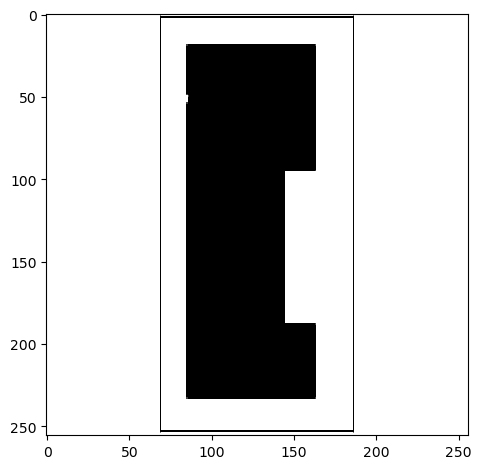

In [261]:
# pixel value of all unique colors
bep_img = read_image(Path(BEP_dir)/BEP_fnames[0])
skimage.io.imshow(bep_img)
print('Image dimension:', bep_img.shape)

In [262]:
bep_arr = bep_img.reshape(-1)
unique_pix_val = np.unique(bep_arr, axis=0)
print('Unique pixel values of a sample:', unique_pix_val)

Unique pixel values of a sample: [  0  64 127 255]


In [263]:
print("Number of unique pixel values of a sample:", len(unique_pix_val))

Number of unique pixel values of a sample: 4


In [264]:
# average area of the samples
areas_list = []

for fname in BEP_fnames:
    bep_img = read_image(Path(BEP_dir)/fname)
    bep_img_gray = skimage.color.rgb2gray(bep_img[:,:,:3])
    num_building_pix = np.count_nonzero(bep_img_gray<0.5)
    area_ratio = num_building_pix / (256*256)
    areas_list.append(area_ratio)

print(f"Average area of building pixels: {np.mean(areas_list)*100} / 100.")

Average area of building pixels: 24.32159423828125 / 100.


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


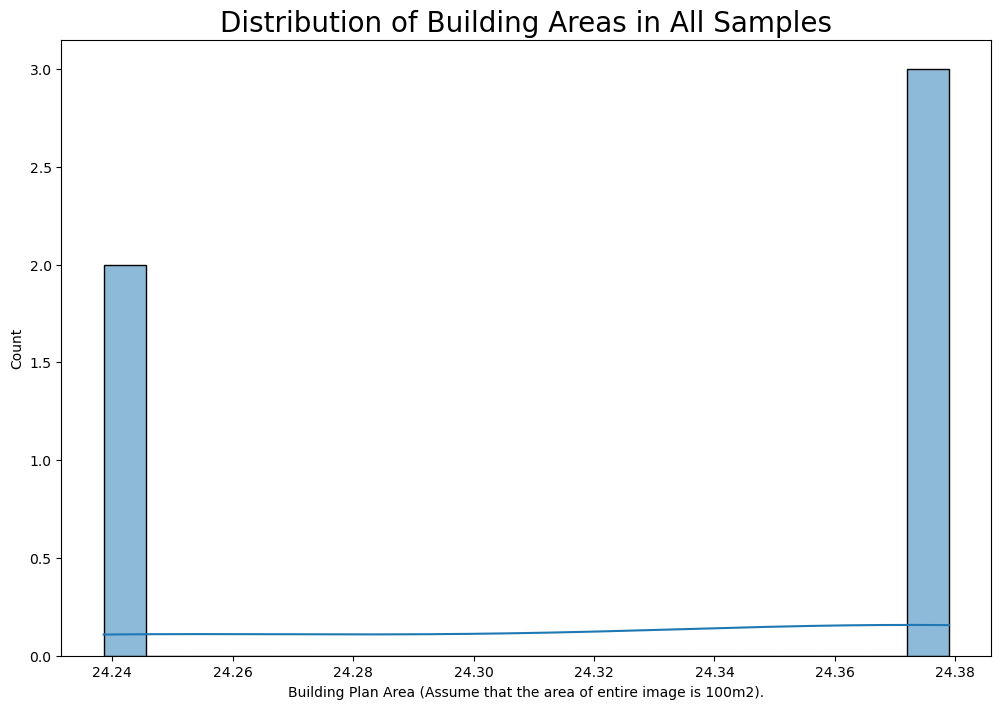

In [265]:
plt.figure(figsize=(12,8))
plt.title("Distribution of Building Areas in All Samples", fontsize=20)
ax = sns.histplot(np.array(areas_list)*100, bins=20, kde=True)
ax.set(xlabel='Building Plan Area (Assume that the area of entire image is 100m2).')
plt.show()

# FSL

In [266]:
# Purple Bedroom 255 27 255 255
# Yellow LivingRoom 255 255 27 255
# Blue Bathroom 27 27 255 255
# Red Kitchen 255 27 27 255
# LightBlue StorageRoom 27 255 255 255
# Green Deck/Porch 27 255 27 255
# Orange Corridor 255 155 27 255

purple = np.array([255, 27, 255, 255])
yellow = np.array([255, 255, 27, 255])
blue = np.array([27, 27, 255, 255])
red = np.array([255, 27, 27, 255])
lightblue = np.array([27, 255, 255, 255])
green = np.array([27, 255, 27, 255])
orange = np.array([255, 155, 27, 255])
white = np.array([255, 255, 255, 255])
black = np.array([0, 0, 0, 255])
darkgreen = np.array([0, 127, 0, 255])

roomtype_pix_val_dict = {
    'bedroom': purple,
    'livingroom': yellow,
    'bathroom': blue,
    'kitchen': red,
    'storageroom': lightblue,
    'deck_or_porch': green,
    'corridor': orange,
    'background': white,
    'stair' : darkgreen,
}

In [267]:
# number of files/samples
# FSL_dir = root + '/dataset/Original/B'
FSL_dir = root + '/dataset/Original/B'
FSL_fnames = os.listdir(FSL_dir)
num_fnames = len(FSL_fnames)

print("Number of files/samples:", num_fnames)

Number of files/samples: 5


Image dimension: (256, 256, 4)


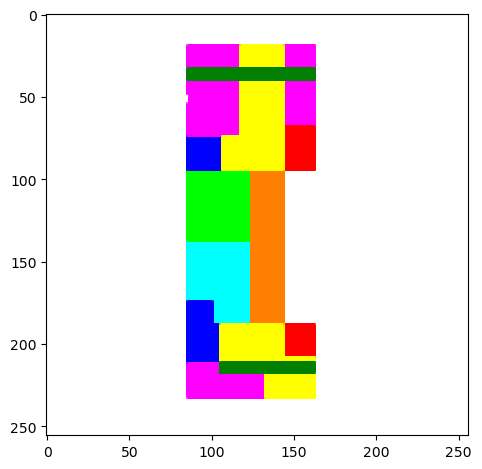

In [268]:
# pixel value of all unique colors
fsl_img = read_image(Path(FSL_dir)/FSL_fnames[0])
skimage.io.imshow(fsl_img)
print('Image dimension:', fsl_img.shape)

In [269]:
fsl_arr = fsl_img.reshape(-1, 4)
unique_pix_val = np.unique(fsl_arr, axis=0)
print('Number of unique pixel values of a sample:', len(unique_pix_val))

Number of unique pixel values of a sample: 22


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


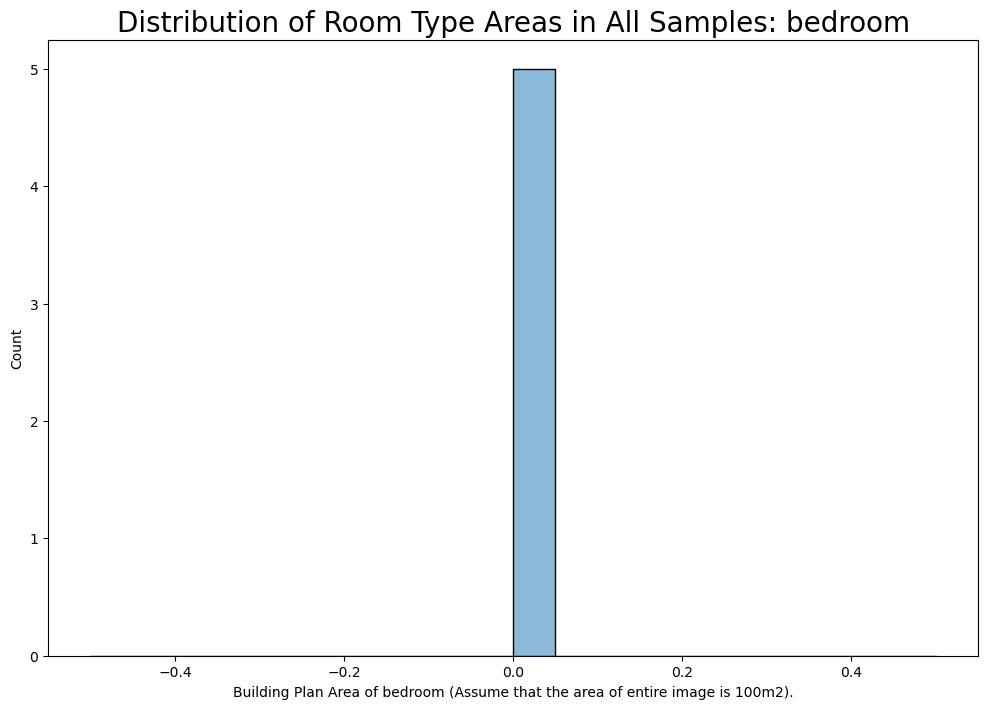

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


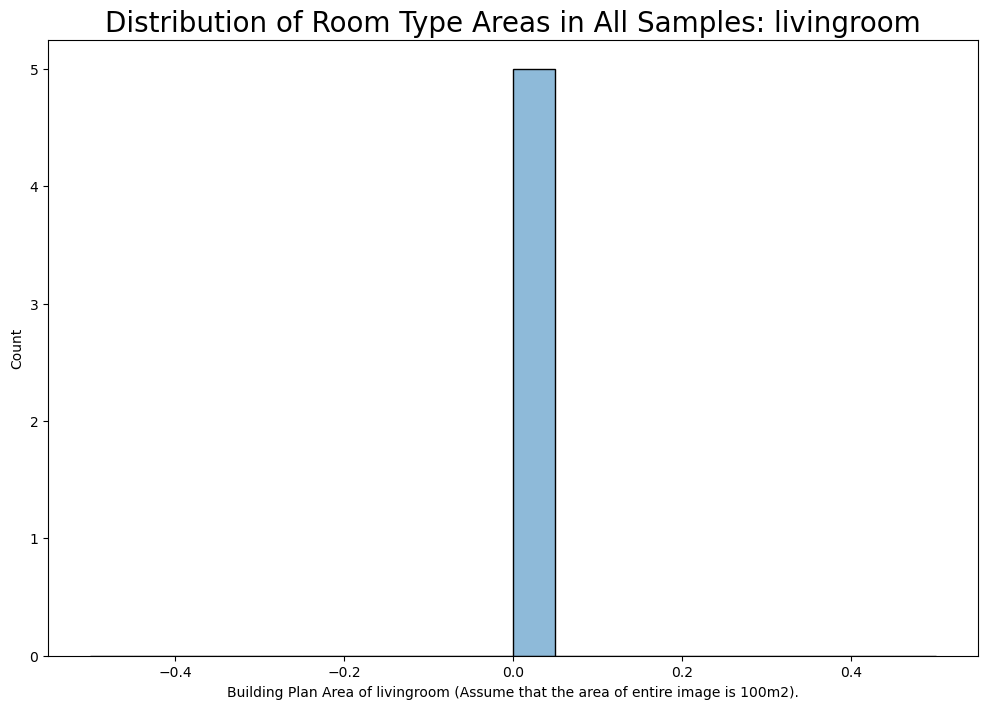

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


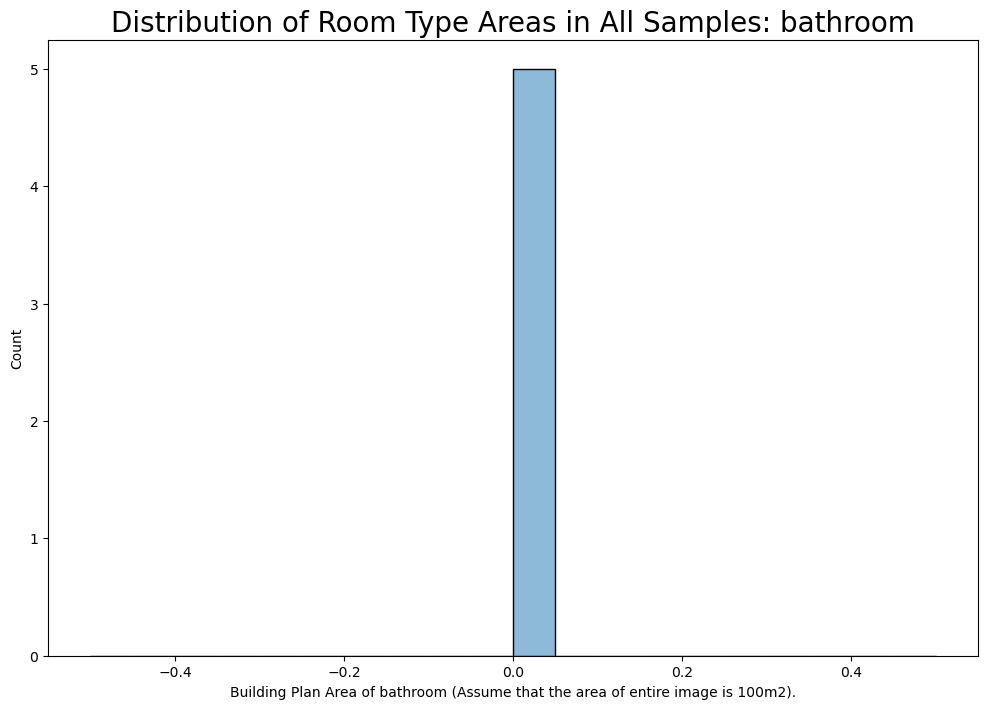

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


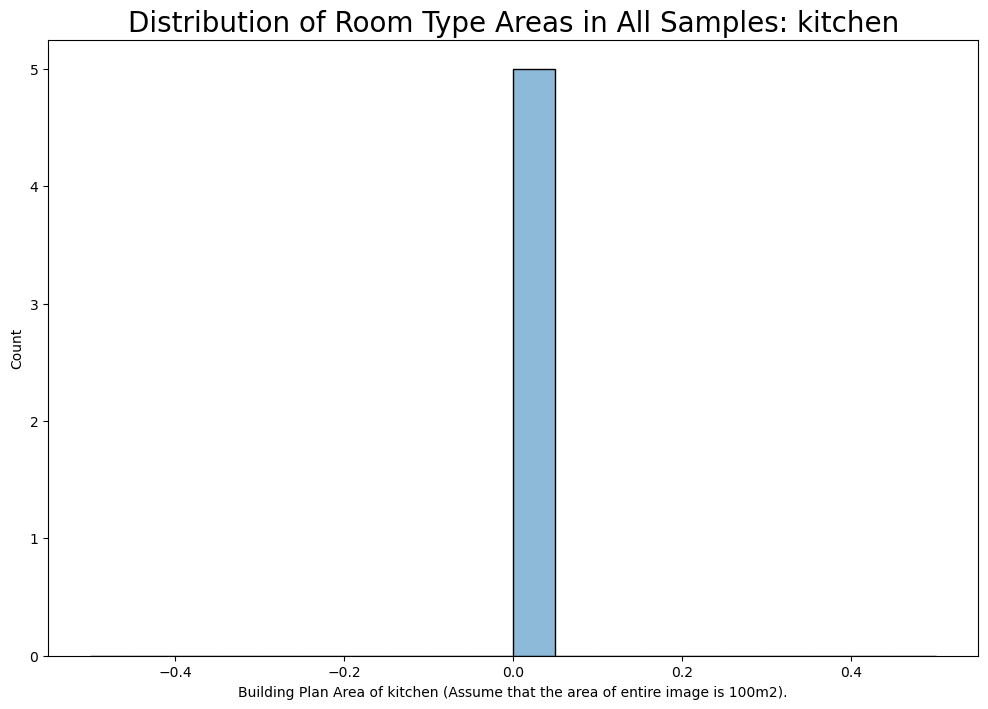

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


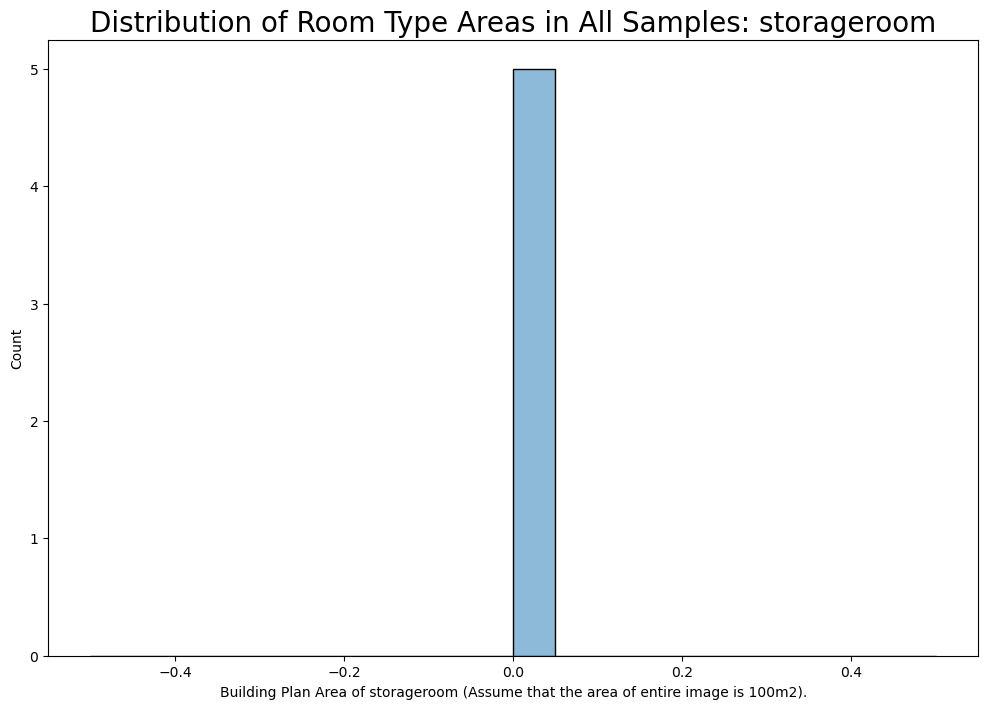

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


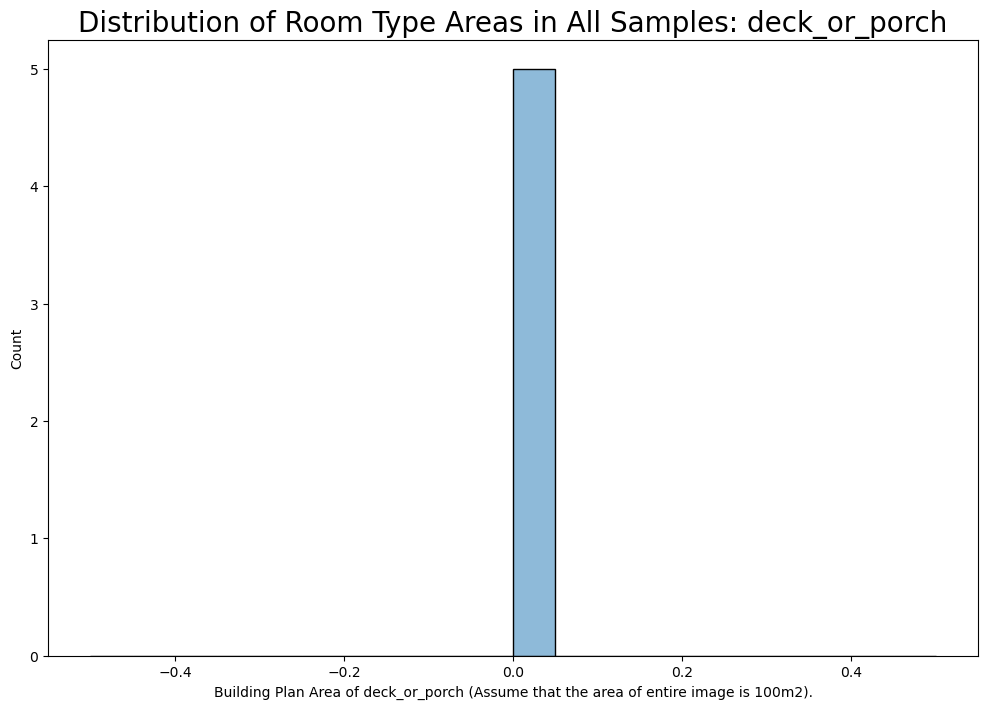

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


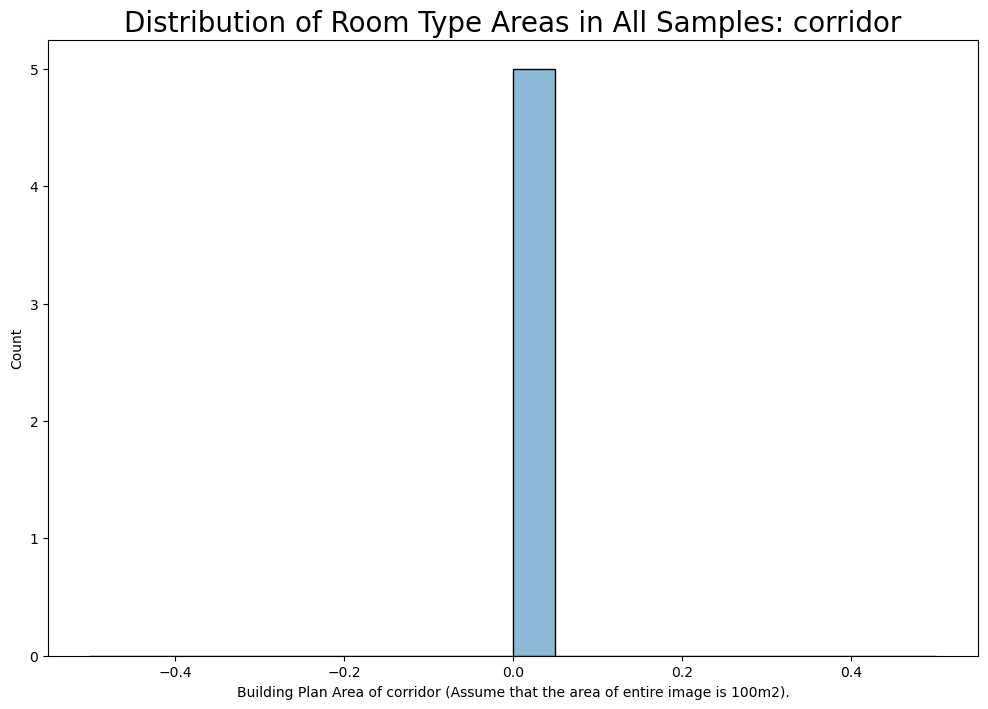

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


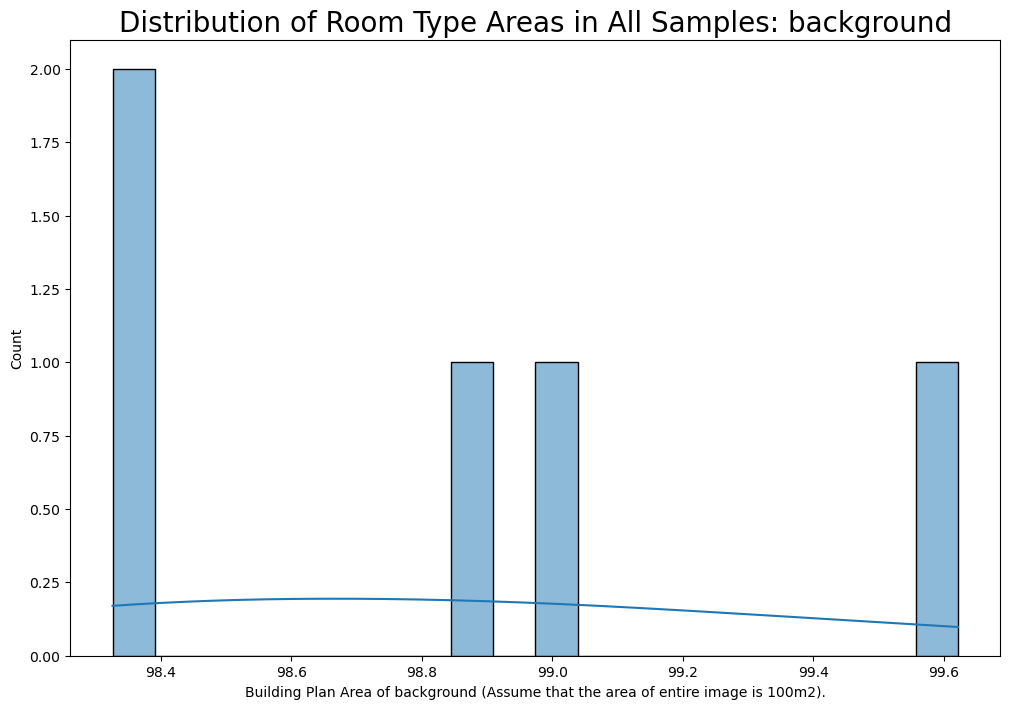

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


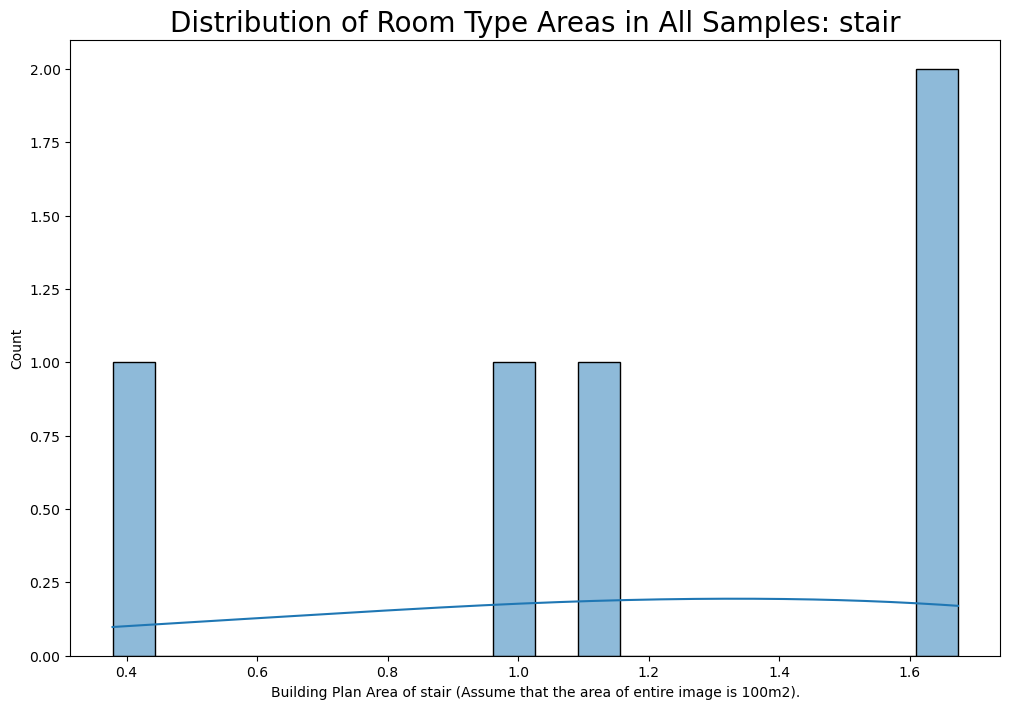

In [270]:
# areas distribution of different samples
roomtype_areas_dict = {
    'bedroom': [],
    'livingroom': [],
    'bathroom': [],
    'kitchen': [],
    'storageroom': [],
    'deck_or_porch': [],
    'corridor': [],
    'background': [],
    'stair' : [],
}

for fname in FSL_fnames:
    fsl_img = read_image(Path(FSL_dir)/fname)
    rm_total_num_pixel = 0

    for rm in roomtype_pix_val_dict:
        rm_color = roomtype_pix_val_dict[rm]
        rm_num_pix = np.count_nonzero((fsl_img==rm_color).all(axis=-1))
        rm_area = rm_num_pix / (256*256) * 100
        roomtype_areas_dict[rm].append(rm_area)

        if rm != 'background':
            rm_total_num_pixel += rm_num_pix
    
    bg_area = (256*256) - rm_total_num_pixel
    roomtype_areas_dict['background'][-1] = bg_area / (256*256) * 100


for rm in roomtype_areas_dict:
    plt.figure(figsize=(12,8))
    plt.title(f"Distribution of Room Type Areas in All Samples: {rm}", fontsize=20)
    ax = sns.histplot(np.array(roomtype_areas_dict[rm]), bins=20, kde=True)
    ax.set(xlabel=f'Building Plan Area of {rm} (Assume that the area of entire image is 100m2).')
    plt.show()


In [271]:
for fname in FSL_fnames:
    fsl_img = read_image(Path(FSL_dir)/fname)
    # Ensure fsl_img has 3 channels (RGB)
    if fsl_img.shape[-1] == 3:
        # Add an alpha channel to create an RGBA image
        fsl_img_rgba = np.zeros((*fsl_img.shape[:2], 4))
        fsl_img_rgba[:, :, :3] = fsl_img
        fsl_img_rgba[:, :, 3] = 1  # Set alpha channel to fully opaque
    else:
        # If fsl_img already has 4 channels, use it directly
        fsl_img_rgba = fsl_img

    rm_total_num_pixel = 0

    for rm in roomtype_pix_val_dict:
        rm_color = roomtype_pix_val_dict[rm]
        # Use fsl_img_rgba for comparison
        rm_num_pix = np.count_nonzero((fsl_img_rgba == rm_color).all(axis=-1))
        rm_area = rm_num_pix / (256*256) * 100
        roomtype_areas_dict[rm].append(rm_area)

        if rm != 'background':
            rm_total_num_pixel += rm_num_pix

    bg_area = (256*256) - rm_total_num_pixel
    roomtype_areas_dict['background'][-1] = bg_area / (256*256) * 100


In [272]:
if rm in roomtype_areas_dict:
    roomtype_areas_dict[rm].append(rm_area)


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


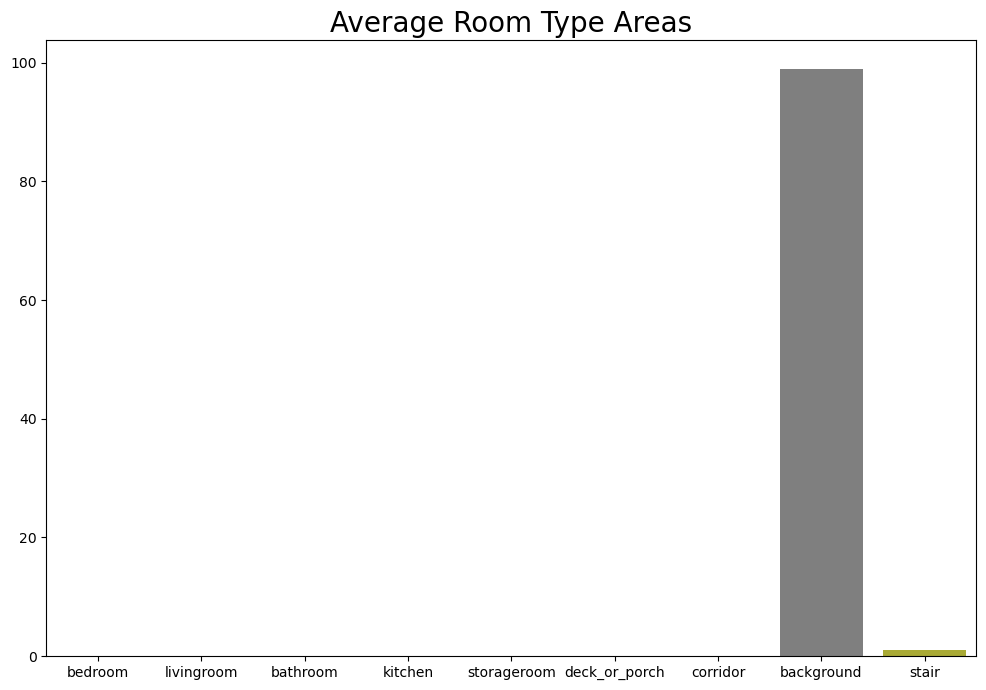

In [273]:
avg_roomtype_areas_list = []

for rm in roomtype_areas_dict:
    avg_roomtype_areas_list.append(
        np.mean(roomtype_areas_dict[rm]))

plt.figure(figsize=(12,8))
plt.title(f"Average Room Type Areas", fontsize=20)
sns.barplot(x=list(roomtype_areas_dict.keys()), y=avg_roomtype_areas_list)
ax.set(xlabel='Room Types')
ax.set(ylabel=f'Average Room Type Area (Assume that the area of entire image is 100m2).')
plt.show()

# BFP